In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import sys
from matplotlib import pyplot
np.set_printoptions(threshold=sys.maxsize)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'



In [14]:
df = pd.read_csv('./Consumption_15min.csv', index_col=0)
print (df.columns)
X = df['Valeur'].values

print (df.dtypes)


Index(['Valeur'], dtype='object')
Valeur    float64
dtype: object


In [41]:
y = df
y = y['Valeur'].replace(to_replace=0, method='ffill')
y.index = pd.to_datetime(y.index)
y.sort_index(inplace=True)
#y.index = y.index.to_timestamp()
#y.index = y.index.to_freq('15T')
y.head(5)

AttributeError: 'DatetimeIndex' object has no attribute 'to_freq'

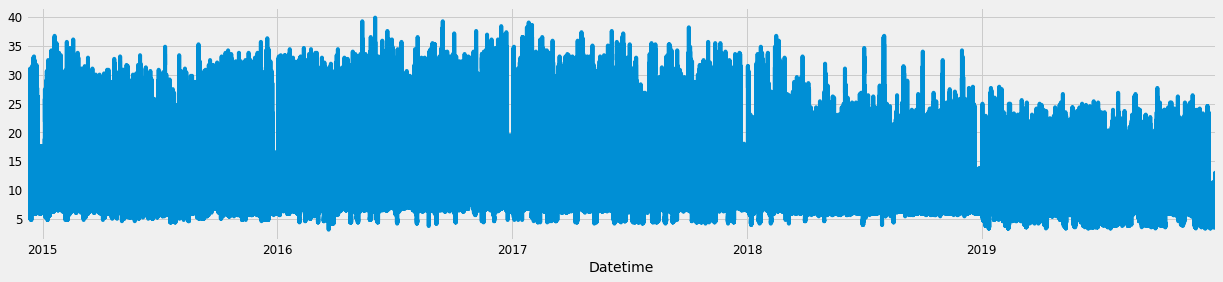

In [37]:
y.plot(figsize =(19,4) )
plt.show()

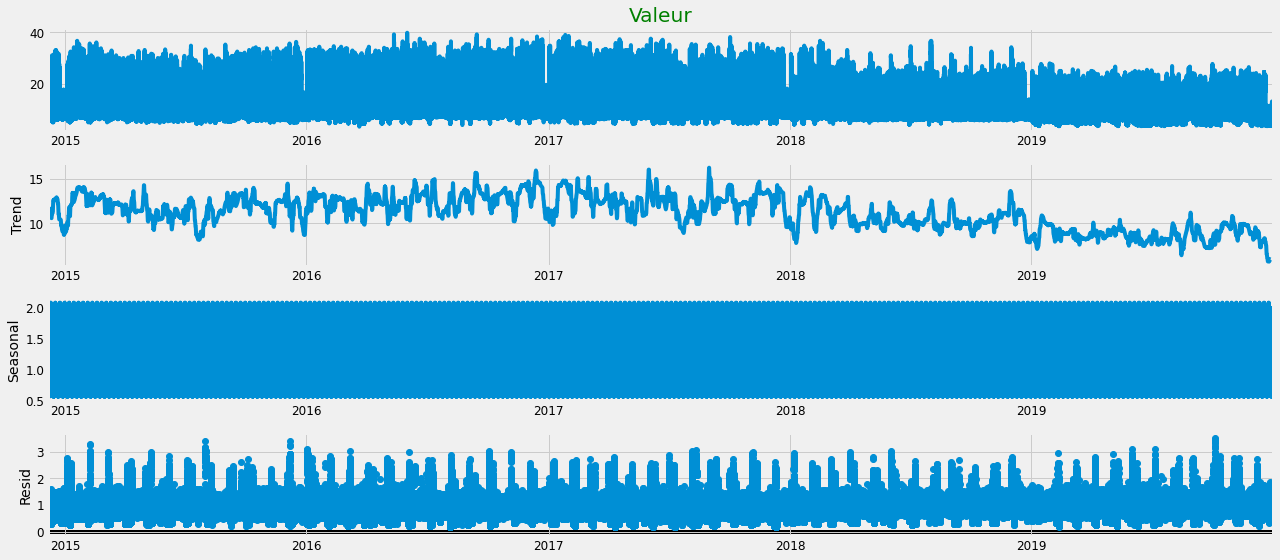

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', period=672)
fig = decomposition.plot()
plt.show()

In [5]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 0, 3, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)


In [ ]:
warnings.filterwarnings("ignore")
aic_min = 100000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            if result.aic < ain_min:
                aic_min = results.aic
                par_min = param
                pars_min = param_seasonal
        except: 
            continue
print('Minimum ARIMA{}x{}12 - AIC:{}'.format(par_min,pars_min,aic_min))


ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:1422066.0990961767
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:1234070.5760877216
ARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:1144771.417745274
ARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:1053414.9182963655
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:979038.7981554725
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:972583.8280304639
ARIMA(0, 0, 0)x(0, 1, 2, 7)12 - AIC:964492.4519493894
ARIMA(0, 0, 0)x(0, 1, 3, 7)12 - AIC:961011.3833242735
ARIMA(0, 0, 0)x(0, 2, 0, 7)12 - AIC:1059041.6807393052
ARIMA(0, 0, 0)x(0, 2, 1, 7)12 - AIC:979043.3848402414
ARIMA(0, 0, 0)x(0, 2, 2, 7)12 - AIC:972585.1371045442
ARIMA(0, 0, 0)x(0, 2, 3, 7)12 - AIC:964451.2603956963
ARIMA(0, 0, 0)x(0, 3, 0, 7)12 - AIC:1186905.3732567078
ARIMA(0, 0, 0)x(0, 3, 1, 7)12 - AIC:1078310.7152873005
ARIMA(0, 0, 0)x(0, 3, 2, 7)12 - AIC:1077572.5849524
ARIMA(0, 0, 0)x(0, 3, 3, 7)12 - AIC:1031727.5730842324
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:975327.0696336391
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:967712.4421984397
ARIMA(0, 0, 0)x(1, 0, 2

ARIMA(0, 0, 2)x(1, 2, 0, 7)12 - AIC:881275.3453960653
ARIMA(0, 0, 2)x(1, 2, 1, 7)12 - AIC:812684.2929489044
ARIMA(0, 0, 2)x(1, 2, 2, 7)12 - AIC:812245.8503896768
ARIMA(0, 0, 2)x(1, 2, 3, 7)12 - AIC:810981.7741699775
ARIMA(0, 0, 2)x(1, 3, 0, 7)12 - AIC:946783.2507848876
ARIMA(0, 0, 2)x(1, 3, 1, 7)12 - AIC:911422.1944694304
ARIMA(0, 0, 2)x(1, 3, 2, 7)12 - AIC:894068.0278760206
ARIMA(0, 0, 2)x(1, 3, 3, 7)12 - AIC:921809.7266982626
ARIMA(0, 0, 2)x(2, 0, 0, 7)12 - AIC:830332.620583936
ARIMA(0, 0, 2)x(2, 0, 1, 7)12 - AIC:806374.0761317704
ARIMA(0, 0, 2)x(2, 0, 2, 7)12 - AIC:803222.7915428978
ARIMA(0, 0, 2)x(2, 0, 3, 7)12 - AIC:802524.8789199624
ARIMA(0, 0, 2)x(2, 1, 0, 7)12 - AIC:811852.1251544143
ARIMA(0, 0, 2)x(2, 1, 1, 7)12 - AIC:811766.7254046852
ARIMA(0, 0, 2)x(2, 1, 2, 7)12 - AIC:810130.4372460156
ARIMA(0, 0, 2)x(2, 1, 3, 7)12 - AIC:772195.4731922112
ARIMA(0, 0, 2)x(2, 2, 0, 7)12 - AIC:857842.245011864
ARIMA(0, 0, 2)x(2, 2, 1, 7)12 - AIC:811899.9856305683
ARIMA(0, 0, 2)x(2, 2, 2, 7)12 

ARIMA(0, 1, 0)x(3, 0, 2, 7)12 - AIC:655401.2226108366
ARIMA(0, 1, 0)x(3, 0, 3, 7)12 - AIC:651934.3789516772
ARIMA(0, 1, 0)x(3, 1, 0, 7)12 - AIC:694597.663831409
ARIMA(0, 1, 0)x(3, 1, 1, 7)12 - AIC:655556.7290150418
ARIMA(0, 1, 0)x(3, 1, 2, 7)12 - AIC:655460.2443182542
ARIMA(0, 1, 0)x(3, 1, 3, 7)12 - AIC:655455.0839220996
ARIMA(0, 1, 0)x(3, 2, 0, 7)12 - AIC:782669.4292367321
ARIMA(0, 1, 0)x(3, 2, 1, 7)12 - AIC:694650.3119725774
ARIMA(0, 1, 0)x(3, 2, 2, 7)12 - AIC:673974.3801860993
ARIMA(0, 1, 0)x(3, 2, 3, 7)12 - AIC:665115.3291022974
ARIMA(0, 1, 0)x(3, 3, 0, 7)12 - AIC:875353.3885444547
ARIMA(0, 1, 0)x(3, 3, 1, 7)12 - AIC:796591.8098887029
ARIMA(0, 1, 0)x(3, 3, 2, 7)12 - AIC:754787.3268645145
ARIMA(0, 1, 0)x(3, 3, 3, 7)12 - AIC:722094.9356268978
ARIMA(0, 1, 1)x(0, 0, 0, 7)12 - AIC:654069.2888387558
ARIMA(0, 1, 1)x(0, 0, 1, 7)12 - AIC:653727.4658706184
ARIMA(0, 1, 1)x(0, 0, 2, 7)12 - AIC:653636.1972874939
ARIMA(0, 1, 1)x(0, 0, 3, 7)12 - AIC:653382.6376433587
ARIMA(0, 1, 1)x(0, 1, 0, 7)12

ARIMA(0, 1, 3)x(0, 2, 2, 7)12 - AIC:654505.8135651344
ARIMA(0, 1, 3)x(0, 2, 3, 7)12 - AIC:655233.8859590885
ARIMA(0, 1, 3)x(0, 3, 0, 7)12 - AIC:1057997.8563364986
ARIMA(0, 1, 3)x(0, 3, 1, 7)12 - AIC:895479.7399288835
ARIMA(0, 1, 3)x(0, 3, 2, 7)12 - AIC:759621.8058132438
ARIMA(0, 1, 3)x(0, 3, 3, 7)12 - AIC:758852.1339993068
ARIMA(0, 1, 3)x(1, 0, 0, 7)12 - AIC:653476.929328942
ARIMA(0, 1, 3)x(1, 0, 1, 7)12 - AIC:653370.5805995966
ARIMA(0, 1, 3)x(1, 0, 2, 7)12 - AIC:653322.8940853551
ARIMA(0, 1, 3)x(1, 0, 3, 7)12 - AIC:653004.1384949595
ARIMA(0, 1, 3)x(1, 1, 0, 7)12 - AIC:719411.4862794081
ARIMA(0, 1, 3)x(1, 1, 1, 7)12 - AIC:653484.2479900391
ARIMA(0, 1, 3)x(1, 1, 2, 7)12 - AIC:653542.8655592316
ARIMA(0, 1, 3)x(1, 1, 3, 7)12 - AIC:653445.2113079589
ARIMA(0, 1, 3)x(1, 2, 0, 7)12 - AIC:859281.6811041827
ARIMA(0, 1, 3)x(1, 2, 1, 7)12 - AIC:719447.1228268994
ARIMA(0, 1, 3)x(1, 2, 2, 7)12 - AIC:654576.0536687433
ARIMA(0, 1, 3)x(1, 2, 3, 7)12 - AIC:654156.7823656634
ARIMA(0, 1, 3)x(1, 3, 0, 7)1

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(3, 0, 3),
                                seasonal_order=(2, 2, 3, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          3.1660      0.003   1102.638      0.000       3.160       3.172
ar.L2         -3.3499      0.006   -550.894      0.000      -3.362      -3.338
ar.L3          1.1840      0.003    363.389      0.000       1.178       1.190
ma.L1         -2.3177      0.003   -718.167      0.000      -2.324      -2.311
ma.L2          1.7733      0.005    379.334      0.000       1.764       1.782
ma.L3         -0.4566      0.002   -237.932      0.000      -0.460      -0.453
ar.S.L7       -0.7547      0.017    -45.665      0.000      -0.787      -0.722
ar.S.L14      -0.3390      0.005    -63.079      0.000      -0.350      -0.328
ma.S.L7       -0.6944      0.017    -41.923      0.000      -0.727      -0.662
ma.S.L14      -0.2394      0.024     -9.899      0.000      -0.287      -0.192
ma.S.L21      -0.0642      0.011     -5.752      0.0

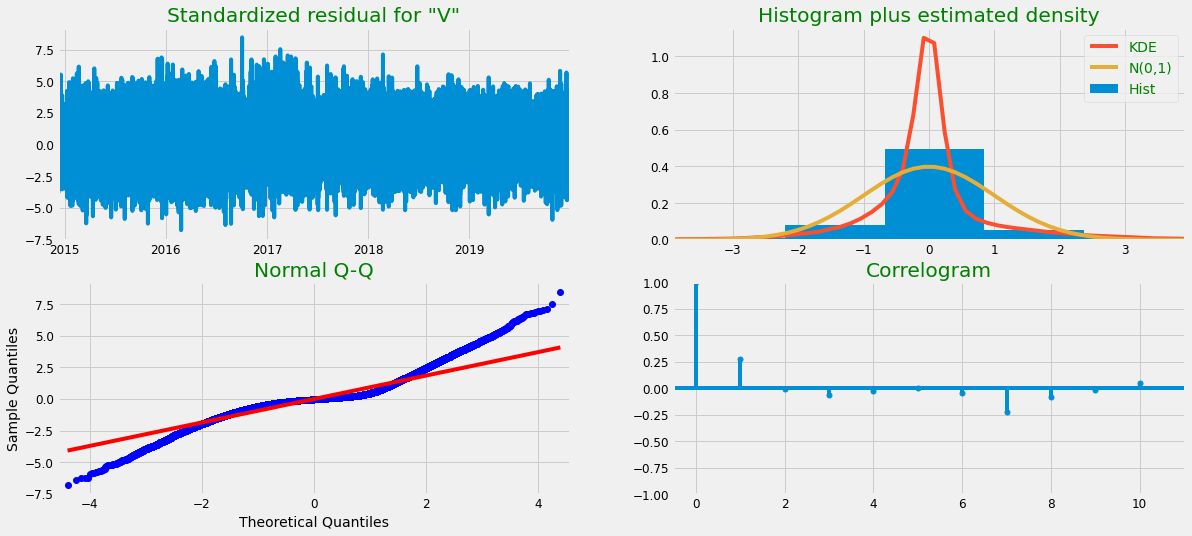

In [42]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [44]:
#Testing the stationarity of the datasets

from statsmodels.tsa.stattools import adfuller

result = adfuller(np.log(y),autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -25.282573
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [45]:
split = round(len(y) / 2)
X1, X2 = y[0:split], y[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=12.198384, mean2=10.182090
variance1=58.093488, variance2=37.991810


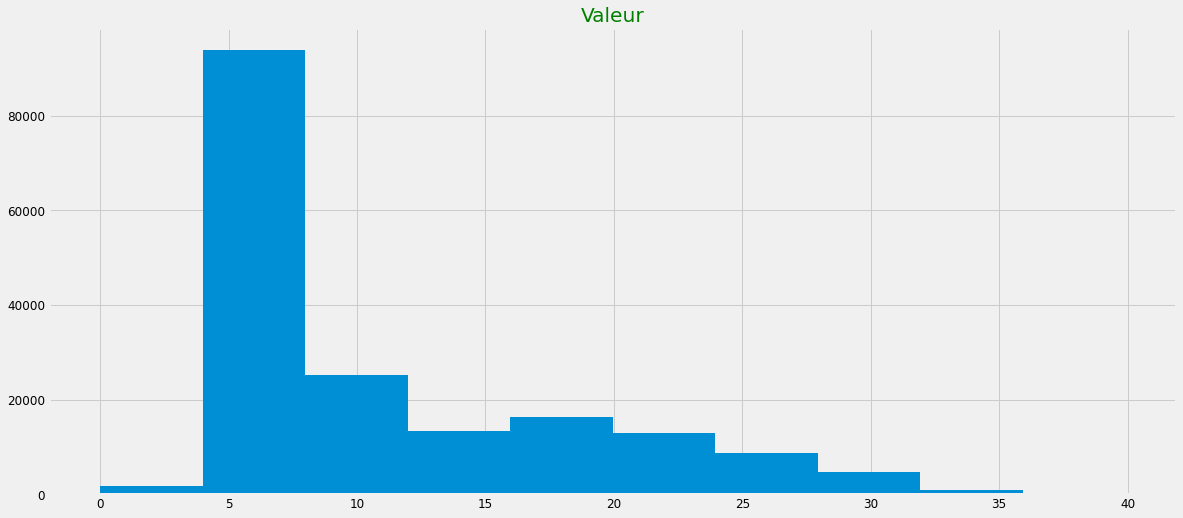

In [46]:
df.hist()
pyplot.show()

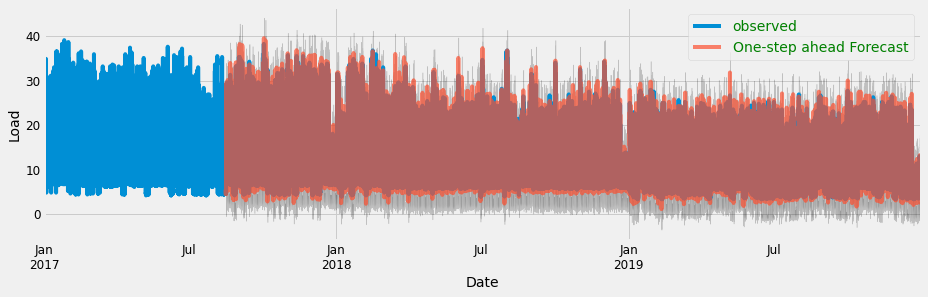

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2017-08-16'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

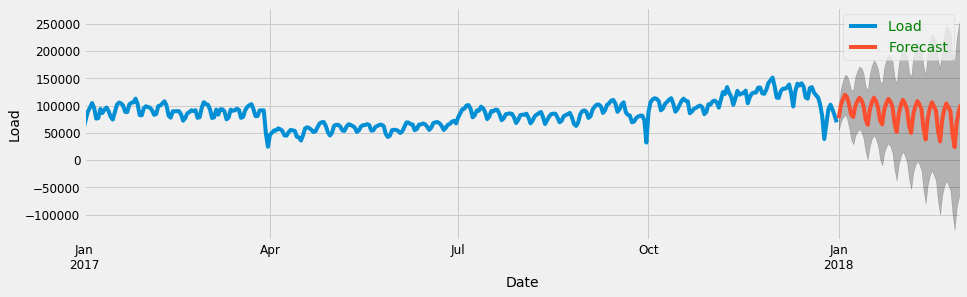

In [13]:

pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

In [16]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2018-01-01     76958.075790
2018-01-02    100868.416020
2018-01-03    111590.112162
2018-01-04    119976.515055
2018-01-05    115724.411756
2018-01-06    101670.634212
2018-01-07     83172.470536
2018-01-08     79327.212950
2018-01-09     99277.673919
2018-01-10    108449.106938
2018-01-11    114367.571228
2018-01-12    110261.678964
2018-01-13     98828.775416
2018-01-14     74944.155997
2018-01-15     64590.172559
2018-01-16     92399.669811
2018-01-17    106448.773035
2018-01-18    114790.533699
2018-01-19    108233.173418
2018-01-20     96317.818703
2018-01-21     72663.567740
2018-01-22     65673.844285
2018-01-23     92545.706150
2018-01-24    104782.033706
2018-01-25    112557.994246
2018-01-26    107534.932374
2018-01-27     96864.711185
2018-01-28     66909.251147
2018-01-29     51672.234230
2018-01-30     84470.172570
Freq: D, dtype: float64

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-08-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2017-08-16 00:00:00   NaN
2017-08-17 00:00:00   NaN
2017-08-18 00:00:00   NaN
2017-08-19 00:00:00   NaN
2017-08-20 00:00:00   NaN
2017-08-21 00:00:00   NaN
2017-08-22 00:00:00   NaN
2017-08-23 00:00:00   NaN
2017-08-24 00:00:00   NaN
2017-08-25 00:00:00   NaN
2017-08-26 00:00:00   NaN
2017-08-27 00:00:00   NaN
2017-08-28 00:00:00   NaN
2017-08-29 00:00:00   NaN
2017-08-30 00:00:00   NaN
2017-08-31 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-09-02 00:00:00   NaN
2017-09-03 00:00:00   NaN
2017-09-04 00:00:00   NaN
2017-09-05 00:00:00   NaN
2017-09-06 00:00:00   NaN
2017-09-07 00:00:00   NaN
2017-09-08 00:00:00   NaN
2017-09-09 00:00:00   NaN
2017-09-10 00:00:00   NaN
2017-09-11 00:00:00   NaN
2017-09-12 00:00:00   NaN
2017-09-13 00:00:00   NaN
2017-09-14 00:00:00   NaN
                       ..
2017-12-03 00:00:00   NaN
2017-12-04 00:00:00   NaN
2017-12-05 00:00:00   NaN
2017-12-06 00:00:00   NaN
2017-12-07 00:00:00   NaN
2017-12-08 00:00:00   NaN
2017-12-09 0